In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [2]:
iris = pd.read_csv('IRIS.csv')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=False)
# profile

In [4]:
df.shape

(150, 5)

In [5]:
df.isna().any().sum()

0

In [6]:
df.duplicated().sum()

3

In [7]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# Decided to keep duplicates
df[df['species'] == 'Iris-setosa'][ df['sepal_length'] == 4.9]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# Decided to keep duplicates
df[df['species'] == 'Iris-virginica'][ df['sepal_length'] == 5.8]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

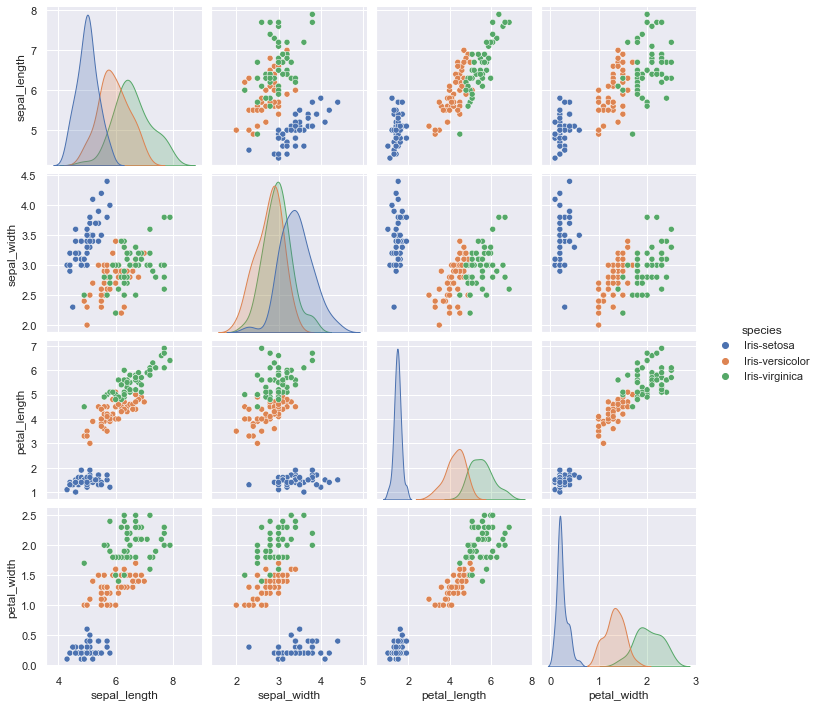

In [11]:
sns.pairplot(df, hue='species');

<AxesSubplot:>

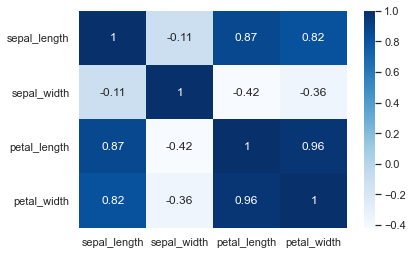

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

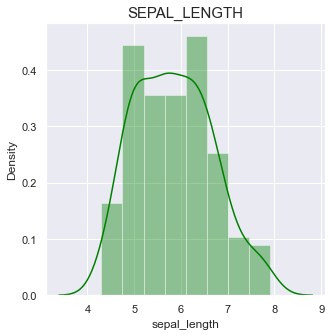

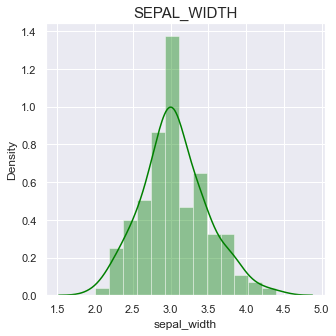

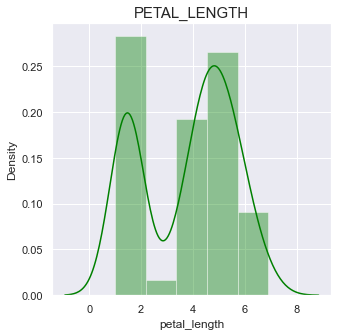

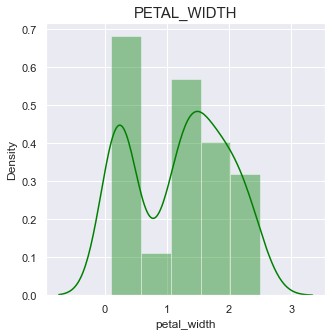

In [13]:
for col in df.drop('species', axis=1).columns:
    plt.figure(figsize=(5,5))
    plt.title(f"{col.upper()}", size=15)
    sns.distplot(df[col], color='Green')

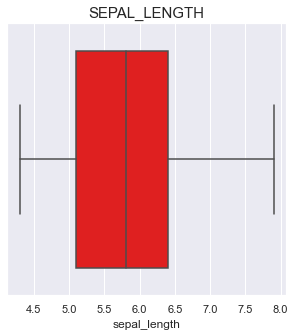

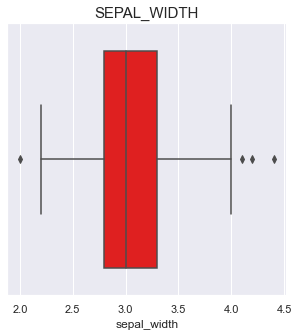

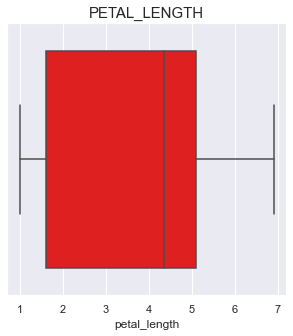

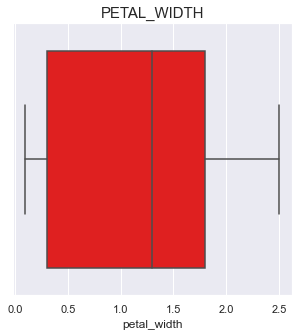

In [14]:
for col in df.drop('species', axis=1).columns:
    plt.figure(figsize=(5,5))
    plt.title(f"{col.upper()}", size=15)
    sns.boxplot(df[col], color='Red')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing for ML

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_col = df.drop('species', axis = 1).columns
df[scale_col] = scaler.fit_transform(df[scale_col])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


### Splitting data into training and testing sets

In [17]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
features = df.drop('species', axis=1)
target = df.species
#target = le.fit_transform(df.species)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=123)

## Multiclass Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(multi_class='multinomial')
model_lr.fit(x_train, y_train)
test_pred = model_lr.predict(x_test)
train_pred = model_lr.predict(x_train)

In [20]:
test_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [21]:
len(y_test) == len(test_pred)

True

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
cm_lr = confusion_matrix(y_test,test_pred)
cm_lr

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 16]], dtype=int64)

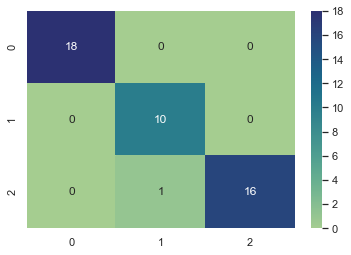

In [23]:
sns.heatmap(data=cm_lr, annot=True, cmap= 'crest');

In [24]:
accuracy_lr_train = accuracy_score(y_train, train_pred)
accuracy_lr_test = accuracy_score(y_test, test_pred)

print(f"Accuracy score on Training-set is: {accuracy_lr_train.round(3)}")
print(f"Accuracy score on Test-set is: {accuracy_lr_test.round(3)}")

Accuracy score on Training-set is: 0.971
Accuracy score on Test-set is: 0.978


In [25]:
print(f"Training set size: {y_train.shape[0]}")
print(f"Test set size: {y_test.shape[0]}")

Training set size: 105
Test set size: 45


Higher Accuracy on test set may be due to having a smaller sample size than the training set. Overfitting may not be an issue.